# EDA 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
jjoo = pd.read_csv("../DATA/jjoo_limpio.csv")


In [19]:
jjoo.head()


,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal,Team_Event,Single_Event,Event_Category
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoM,China,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoM,China,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoM,Denmark,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,59.0,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoM,Netherlands,0,0,0,0


In [20]:

jjoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222552 entries, 0 to 222551
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              222552 non-null  int64  
 1   Name            222552 non-null  object 
 2   Sex             222552 non-null  object 
 3   Age             222552 non-null  float64
 4   Height          222552 non-null  float64
 5   Weight          222552 non-null  float64
 6   NOC             222552 non-null  object 
 7   Games           222552 non-null  object 
 8   Year            222552 non-null  int64  
 9   Season          222552 non-null  object 
 10  City            222552 non-null  object 
 11  Sport           222552 non-null  object 
 12  Event           222552 non-null  object 
 13  Medal           222552 non-null  object 
 14  Country         222552 non-null  object 
 15  Has_Medal       222552 non-null  int64  
 16  Team_Event      222552 non-null  int64  
 17  Single_Eve

In [21]:

jjoo.isnull().sum()

ID                0
Name              0
Sex               0
Age               0
Height            0
Weight            0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
Country           0
Has_Medal         0
Team_Event        0
Single_Event      0
Event_Category    0
dtype: int64

# Hipótesis 1-Impacto de las Guerras Mundiales en los Juegos Olimpicos (Partcipacion  y medallas)
Las Guerras Mundiales tuvieron un impacto significativo en la participación de países y atletas en los Juegos Olímpicos, ademas de la distribucion de las medallas entre estos especialmente en los periodos inmediatamente posteriores a los conflictos.

In [22]:
jjoo.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'NOC', 'Games', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'Country', 'Has_Medal',
       'Team_Event', 'Single_Event', 'Event_Category'],
      dtype='object')

¿Se observa una ruptura en la participación durante las Guerras Mundiales?

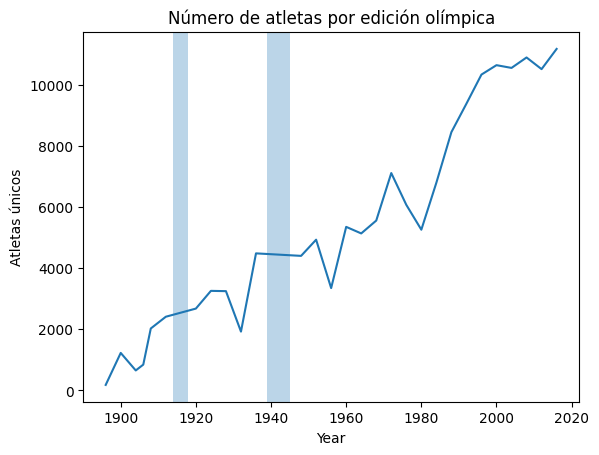

In [23]:
athletes_per_year = jjoo.groupby("Year")["ID"].nunique()

import matplotlib.pyplot as plt

plt.figure()
athletes_per_year.plot()
plt.axvspan(1914, 1918, alpha=0.3)
plt.axvspan(1939, 1945, alpha=0.3)
plt.title("Número de atletas por edición olímpica")
plt.ylabel("Atletas únicos")
plt.show()

El gráfico muestra una tendencia creciente en la participación olímpica a lo largo del tiempo, interrumpida claramente durante los periodos correspondientes a la Primera y Segunda Guerra Mundial. Estas rupturas rompen la tendencia ascendente y evidencian el impacto de los conflictos bélicos en la celebración y escala de los Juegos Olímpicos. La recuperación posterior no es inmediata, lo que sugiere efectos desiguales entre países.

## I Guerra Mundial (análisis por países) PARTICIPACION

¿Qué países reducen más su participación tras la IGM?

In [28]:
before_igm = jjoo[jjoo["Year"] == 1912]
after_igm  = jjoo[jjoo["Year"] == 1920]

ath_1912 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1920 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_igm = (
    pd.concat([ath_1912, ath_1920], axis=1)
    .fillna(0)
)
impact_igm.columns = ["1912", "1920"]
impact_igm["diff"] = impact_igm["1920"] - impact_igm["1912"]

impact_igm.sort_values("diff").head(10)

,1912,1920,diff
Country,,,
Germany,185.0,0.0,-185.0
Sweden,444.0,260.0,-184.0
Russia,159.0,0.0,-159.0
Hungary,121.0,0.0,-121.0
Finland,164.0,63.0,-101.0
Austria,85.0,0.0,-85.0
UK,274.0,234.0,-40.0
Chile,14.0,2.0,-12.0
Australia,25.0,13.0,-12.0


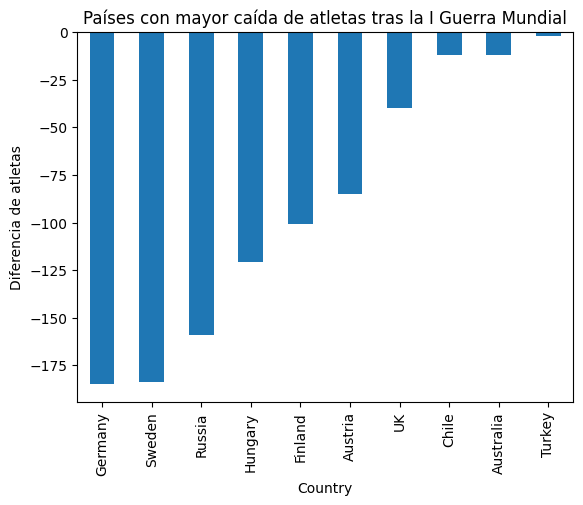

In [29]:
impact_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El análisis por países tras la Primera Guerra Mundial revela un impacto claramente desigual en la participación olímpica. Países europeos como Alemania, Austria, Hungría y Rusia presentan las mayores caídas en el número de atletas entre 1912 y 1920, llegando en algunos casos a no participar en los Juegos posteriores al conflicto. Esta reducción puede explicarse por las consecuencias políticas, económicas y demográficas de la guerra, así como por sanciones y exclusiones en el contexto de posguerra. Por el contrario, países menos afectados directamente por el conflicto muestran descensos más moderados, lo que refuerza la idea de un impacto regionalmente desigual.

## II Guerra Mundial (análisis por países) PARTICIPACION

In [33]:
before_iigm = jjoo[jjoo["Year"] == 1936]
after_iigm  = jjoo[jjoo["Year"] == 1948]

ath_1936 = jjoo[jjoo["Year"] == 1912].groupby("Country")["ID"].nunique()
ath_1948 = jjoo[jjoo["Year"] == 1920].groupby("Country")["ID"].nunique()

impact_iigm = (
    pd.concat([ath_1936, ath_1948], axis=1)
    .fillna(0)
)
impact_iigm.columns = ["1936", "1948"]
impact_iigm["diff"] = impact_iigm["1948"] - impact_iigm["1936"]

impact_iigm.sort_values("diff").head(10)


,1936,1948,diff
Country,,,
Germany,185.0,0.0,-185.0
Sweden,444.0,260.0,-184.0
Russia,159.0,0.0,-159.0
Hungary,121.0,0.0,-121.0
Finland,164.0,63.0,-101.0
Austria,85.0,0.0,-85.0
UK,274.0,234.0,-40.0
Chile,14.0,2.0,-12.0
Australia,25.0,13.0,-12.0


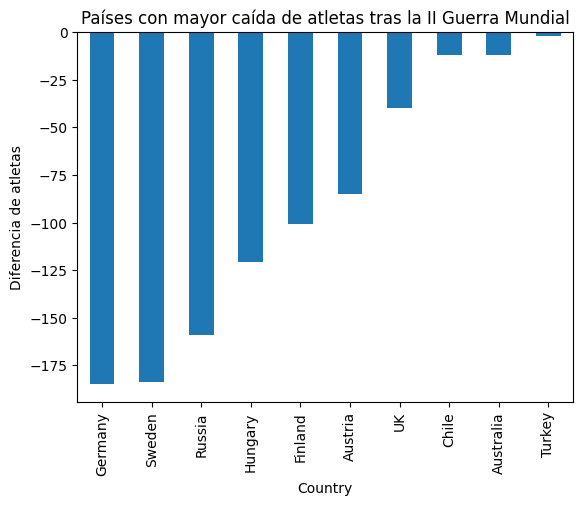

In [35]:
impact_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas")
plt.show()

El gráfico evidencia dos patrones diferenciados en el impacto de la posguerra. Por un lado, países como Alemania, Austria, Hungría o Rusia no registran participación en la edición posterior al conflicto, lo que refleja exclusiones políticas y sanciones internacionales más que una falta de capacidad deportiva. Por otro lado, países como Finlandia o Suecia sí continúan participando, pero mantienen un número de atletas prácticamente idéntico al observado tras la Primera Guerra Mundial, lo que sugiere un comportamiento estructural de reducción de delegaciones en contextos de posguerra. En conjunto, los datos muestran que el impacto de la guerra no solo se manifiesta en la ausencia total de algunos países, sino también en la repetición de patrones de participación reducida en aquellos que sí logran competir.

In [40]:
impact_iigm.sort_values("diff").tail(10)

,1936,1948,diff
Country,,,
Brazil,0.0,19.0,19.0
Greece,22.0,47.0,25.0
Spain,0.0,58.0,58.0
Switzerland,7.0,77.0,70.0
Czech Republic,43.0,119.0,76.0
Netherlands,33.0,130.0,97.0
Italy,66.0,174.0,108.0
USA,174.0,288.0,114.0
France,119.0,304.0,185.0


## Recuperacion tras las guerras en relacion a la participacion del numero de atletas por pais

## Recuperacion tras la Primera Guerra Mundial

In [63]:
recovery_igm = impact_igm[impact_igm["1920"] > 0]

In [64]:
recovery_igm.sort_values("diff", ascending=False).head(10)

,1912,1920,diff
Country,,,
Belgium,36.0,336.0,300.0
France,119.0,304.0,185.0
USA,174.0,288.0,114.0
Italy,66.0,174.0,108.0
Netherlands,33.0,130.0,97.0
Czech Republic,43.0,119.0,76.0
Switzerland,7.0,77.0,70.0
Spain,0.0,58.0,58.0
Greece,22.0,47.0,25.0


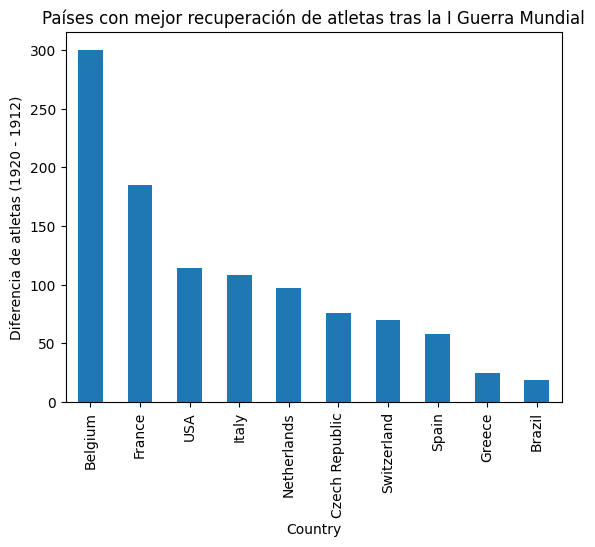

In [65]:
recovery_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la I Guerra Mundial")
plt.ylabel("Diferencia de atletas (1920 - 1912)")
plt.show()

Al analizar la recuperación tras la Primera Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1920, se observa que la capacidad de recuperación fue desigual. Algunos países lograron mantener o reducir mínimamente su número de atletas respecto a 1912, mientras que otros sufrieron descensos más acusados. Estos resultados sugieren que, incluso entre los países no sancionados, la recuperación de la participación olímpica estuvo condicionada por factores económicos, organizativos y sociales propios del periodo de posguerra.

## Recuperacion tras Segunda Guerra Mundial

No todos los países parten de las mismas condiciones tras una guerra: algunos fueron excluidos políticamente y no pudieron participar, mientras que otros sí compitieron y, por tanto, pudieron iniciar antes su recuperación deportiva.

In [42]:
recovery_iigm = impact_iigm[impact_iigm["1948"] > 0]

In [43]:
recovery_iigm.sort_values("diff", ascending=False).head(10) #paises con mayor recuperacion

,1936,1948,diff
Country,,,
Belgium,36.0,336.0,300.0
France,119.0,304.0,185.0
USA,174.0,288.0,114.0
Italy,66.0,174.0,108.0
Netherlands,33.0,130.0,97.0
Czech Republic,43.0,119.0,76.0
Switzerland,7.0,77.0,70.0
Spain,0.0,58.0,58.0
Greece,22.0,47.0,25.0


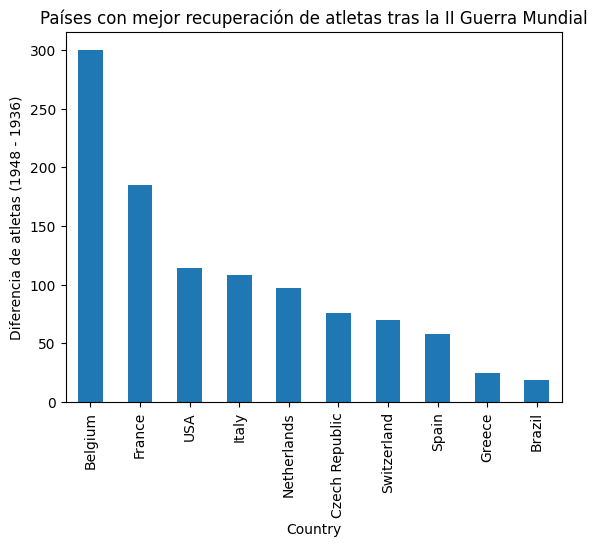

In [44]:
recovery_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor recuperación de atletas tras la II Guerra Mundial")
plt.ylabel("Diferencia de atletas (1948 - 1936)")
plt.show()

Al analizar la recuperación tras la II Guerra Mundial únicamente en aquellos países que sí participaron en los Juegos de 1948, se observa que la recuperación no fue homogénea. Algunos países lograron mantener o incluso aumentar su número de atletas respecto a 1936, lo que sugiere una mayor capacidad de reorganización deportiva y recuperación económica en el periodo de posguerra. En contraste, otros países, aunque no fueron excluidos, muestran una recuperación limitada, reflejando que los efectos del conflicto persistieron más allá del final de la guerra. Este análisis pone de manifiesto que la recuperación olímpica estuvo condicionada tanto por factores políticos como por la situación económica y social de cada país.

# Impacto de las Guerras Mundiales en el número de medallas por país

El análisis de medallas permite evaluar cómo las Guerras Mundiales afectaron no solo a la participación, sino también al rendimiento deportivo de los países, teniendo en cuenta que la ausencia de participación implica automáticamente una pérdida total de medallas.

In [45]:
medals_df = jjoo[jjoo["Medal"] != "NoM"]

## I Guerra Mundial: medallas antes y después (1912 vs 1920)

### Paises perjudicados

In [51]:
medals_1912 = (
    medals_df[medals_df["Year"] == 1912]
    .groupby("Country")["Medal"]
    .count()
)

medals_1920 = (
    medals_df[medals_df["Year"] == 1920]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_igm = (
    pd.concat([medals_1912, medals_1920], axis=1)
    .fillna(0)
)

impact_medals_igm.columns = ["1912", "1920"]
impact_medals_igm["diff"] = impact_medals_igm["1920"] - impact_medals_igm["1912"]

impact_medals_igm.sort_values("diff").head(10)

,1912,1920,diff
Country,,,
UK,170.0,111.0,-59.0
Germany,53.0,0.0,-53.0
Sweden,190.0,154.0,-36.0
Hungary,30.0,0.0,-30.0
Finland,71.0,52.0,-19.0
Denmark,87.0,71.0,-16.0
Austria,14.0,0.0,-14.0
Russia,14.0,0.0,-14.0
Australia,10.0,7.0,-3.0


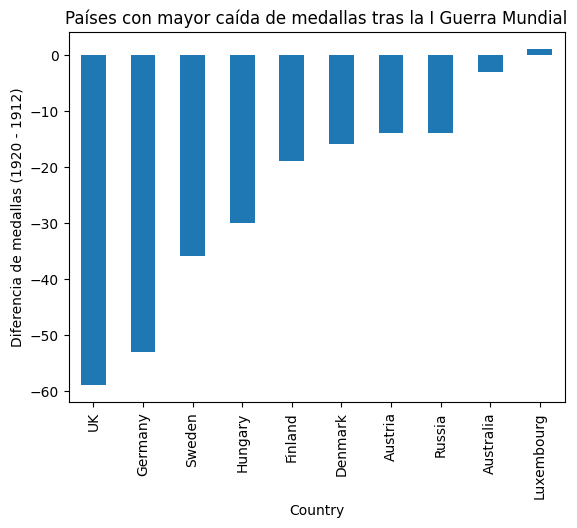

In [52]:
impact_medals_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

### Paises benificiados

In [55]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)

,1912,1920,diff
Country,,,
Belgium,19.0,188.0,169.0
France,26.0,141.0,115.0
USA,107.0,194.0,87.0
Italy,25.0,84.0,59.0
Norway,80.0,137.0,57.0
Switzerland,2.0,29.0,27.0
Netherlands,26.0,50.0,24.0
Spain,0.0,23.0,23.0
South Africa,7.0,21.0,14.0


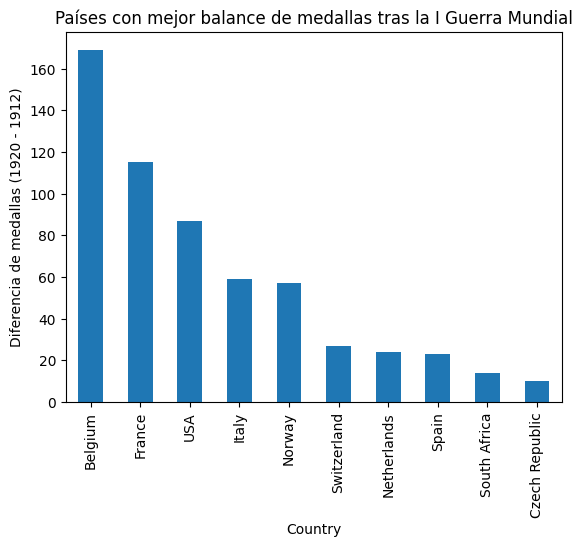

In [56]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.show()

El análisis del número de medallas antes y después de la Primera Guerra Mundial pone de manifiesto un doble efecto del conflicto en el rendimiento olímpico. Por un lado, varios países experimentan una caída muy pronunciada o total en su número de medallas, especialmente aquellos directamente implicados en la guerra o excluidos de los Juegos de 1920, lo que refleja el impacto de las sanciones políticas y las dificultades del periodo de posguerra. Por otro lado, algunos países muestran un aumento o una menor pérdida de medallas, lo que no debe interpretarse únicamente como una mejora deportiva, sino también como consecuencia de la ausencia de competidores históricamente fuertes. En conjunto, los resultados evidencian que la Primera Guerra Mundial no solo perjudicó a determinados países, sino que también alteró el equilibrio competitivo, redistribuyendo el reparto de medallas entre los países participantes.

## II Guerra Mundial: medallas antes y después (1936 vs 1948)

### Paises perjudicados

In [53]:
medals_1936 = (
    medals_df[medals_df["Year"] == 1936]
    .groupby("Country")["Medal"]
    .count()
)

medals_1948 = (
    medals_df[medals_df["Year"] == 1948]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_iigm = (
    pd.concat([medals_1936, medals_1948], axis=1)
    .fillna(0)
)

impact_medals_iigm.columns = ["1936", "1948"]
impact_medals_iigm["diff"] = impact_medals_iigm["1948"] - impact_medals_iigm["1936"]

impact_medals_iigm.sort_values("diff").head(10)

,1936,1948,diff
Country,,,
Germany,224.0,0.0,-224.0
Austria,55.0,8.0,-47.0
Japan,23.0,0.0,-23.0
Switzerland,52.0,36.0,-16.0
Canada,22.0,7.0,-15.0
Poland,12.0,2.0,-10.0
Norway,28.0,18.0,-10.0
Italy,76.0,67.0,-9.0
Mexico,16.0,9.0,-7.0


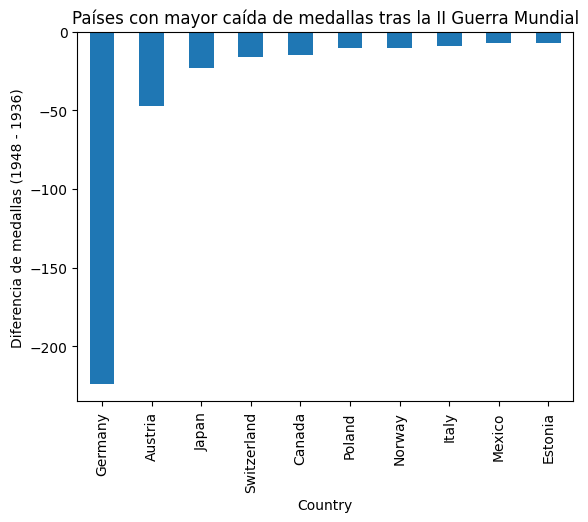

In [54]:
impact_medals_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor caída de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

### Paises benificiados

In [50]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)

,1936,1948,diff
Country,,,
USA,96.0,152.0,56.0
Denmark,6.0,51.0,45.0
Sweden,35.0,75.0,40.0
France,44.0,72.0,28.0
UK,36.0,61.0,25.0
Hungary,41.0,62.0,21.0
Serbia,1.0,16.0,15.0
Australia,1.0,16.0,15.0
Brazil,0.0,10.0,10.0


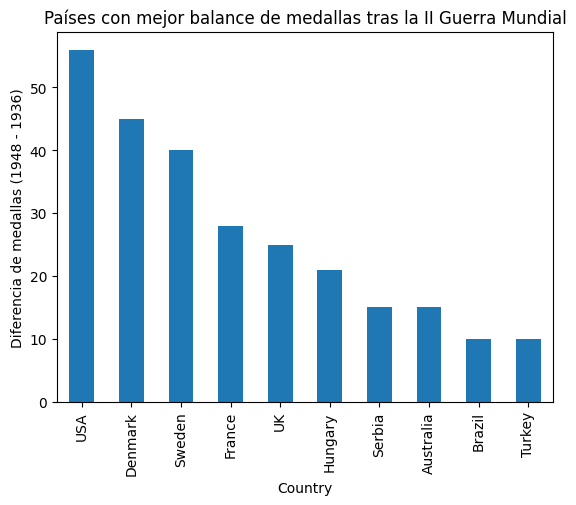

In [57]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mejor balance de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.show()

Tras la Segunda Guerra Mundial, el impacto en el número de medallas resulta aún más acusado y generalizado. Numerosos países presentan una pérdida total o muy significativa de medallas debido a su ausencia en los Juegos de 1948, consecuencia directa de sanciones y exclusiones políticas en el contexto de la posguerra. Al mismo tiempo, se observa que algunos países incrementan su número de medallas respecto a 1936, lo que sugiere una redistribución del medallero derivada de una menor competencia internacional. Este fenómeno indica que el conflicto no solo afectó negativamente al rendimiento de los países sancionados, sino que también modificó el balance deportivo global, beneficiando indirectamente a aquellos países que pudieron participar y reorganizarse con mayor rapidez tras la guerra.

Comparando ambos conflictos, se observa que tanto la Primera como la Segunda Guerra Mundial generaron pérdidas significativas de medallas en numerosos países, aunque el impacto de la Segunda Guerra Mundial fue más severo y afectó a un mayor número de países. En ambos casos, las guerras alteraron de forma notable el reparto de medallas, evidenciando que los Juegos Olímpicos reflejan no solo el rendimiento deportivo, sino también las consecuencias de los grandes acontecimientos históricos y políticos

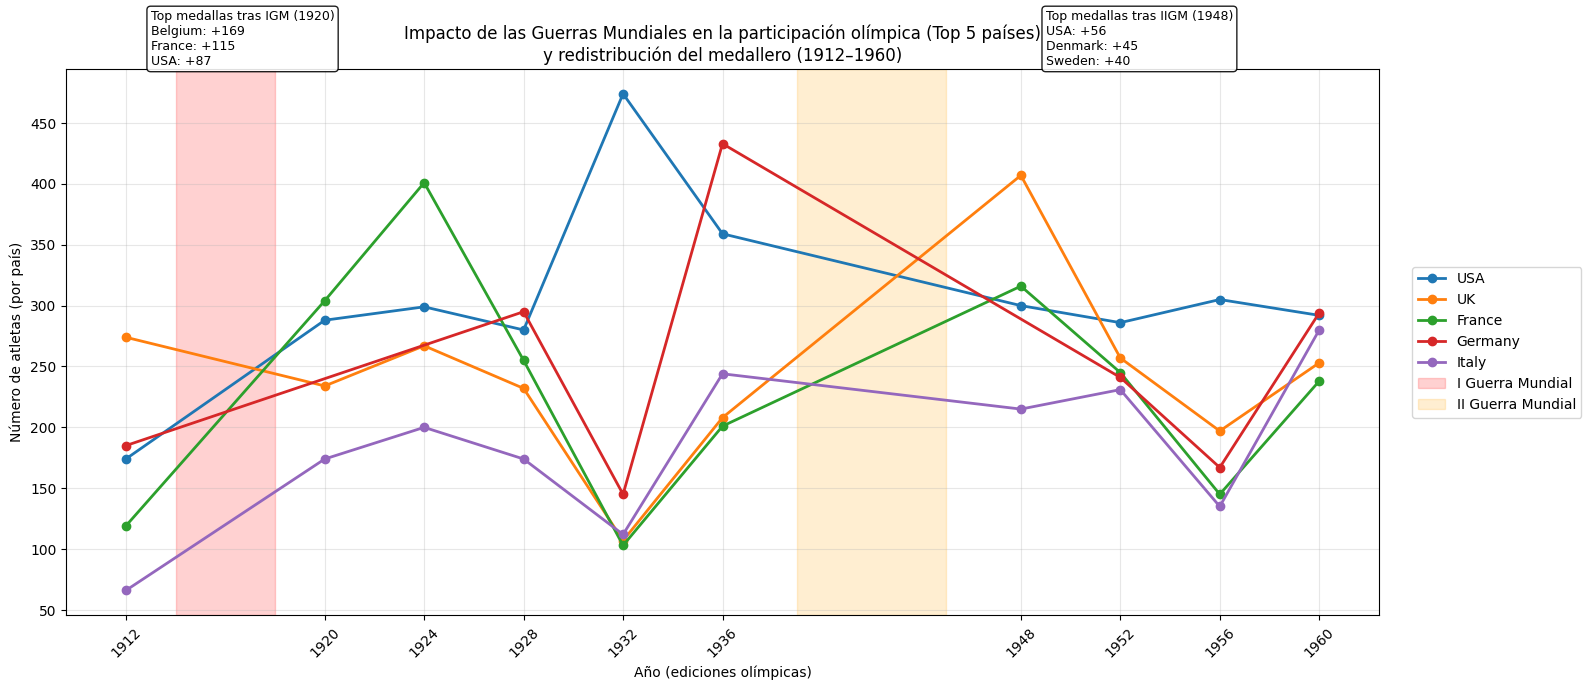

In [78]:
# Periodo de interés
jjoo_period = jjoo[(jjoo["Year"] >= 1912) & (jjoo["Year"] <= 1960)]

# Top 5 países por participación (atletas únicos acumulados en el periodo)
top_countries = (
    jjoo_period
    .groupby("Country")["ID"]
    .nunique()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Serie: atletas por país y año (para las líneas) 
country_year = (
    jjoo_period
    .groupby(["Year", "Country"])["ID"]
    .nunique()
    .reset_index()
)
country_year_top = country_year[country_year["Country"].isin(top_countries)]

# Eje X: años de ediciones olímpicas en el periodo
olympic_years = sorted(jjoo_period["Year"].unique())

plt.figure(figsize=(16, 7))

# Líneas por país (participación) 
for country in top_countries:
    data = country_year_top[country_year_top["Country"] == country]
    plt.plot(
        data["Year"],
        data["ID"],
        marker="o",
        linewidth=2,
        label=country
    )

#  Guerras
plt.axvspan(1914, 1918, color="red", alpha=0.18, label="I Guerra Mundial")
plt.axvspan(1939, 1945, color="orange", alpha=0.18, label="II Guerra Mundial")

#  Medallero:
top_med_igm = impact_medals_igm.sort_values("diff", ascending=False).head(3)
top_med_iigm = impact_medals_iigm.sort_values("diff", ascending=False).head(3)

text_igm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_igm.iterrows()])
text_iigm = "\n".join([f"{c}: +{int(v['diff'])}" for c, v in top_med_iigm.iterrows()])

# Posición vertical de cajas (arriba del gráfico)
y_top = country_year_top["ID"].max() * 1.05

plt.text(
    1913, y_top,
    f"Top medallas tras IGM (1920)\n{text_igm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)

plt.text(
    1949, y_top,
    f"Top medallas tras IIGM (1948)\n{text_iigm}",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.88),
    fontsize=9
)


plt.title(
    "Impacto de las Guerras Mundiales en la participación olímpica (Top 5 países)\n"
    "y redistribución del medallero (1912–1960)"
)
plt.xlabel("Año (ediciones olímpicas)")
plt.ylabel("Número de atletas (por país)")
plt.xticks(olympic_years, rotation=45)
plt.grid(alpha=0.3)

# Leyenda fuera para que no tape líneas
plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

El gráfico muestra la evolución de la participación olímpica (número de atletas) de los cinco países más participativos entre 1912 y 1960, permitiendo observar caídas, ausencias y recuperaciones diferenciales durante las Guerras Mundiales. Además, se incorpora el “beneficio” en medallas tras cada posguerra (1920 y 1948), lo que evidencia que los conflictos no solo afectan a quién participa, sino también al reparto competitivo: la ausencia o debilitamiento de ciertos países altera el equilibrio del medallero y puede favorecer a otros países en términos de medallas obtenidas.

# Hipótesis 2 — Evolución de los Juegos Olímpicos por franjas históricas y eventos significativos

Planteamos que los Juegos Olímpicos evolucionan por etapas históricas diferenciadas, definidas por grandes acontecimientos políticos, económicos y sociales. Estas etapas influyen de forma directa en la participación olímpica y en el reparto de medallas, generando patrones distintos en cada periodo

## Periodo temprano de los Juegos Olímpicos (hasta 1912)

El periodo temprano corresponde a las primeras ediciones de los Juegos Olímpicos modernos, caracterizadas por una participación limitada y una estructura organizativa aún en desarrollo. En esta etapa, los Juegos presentan un carácter marcadamente elitista, con predominio de países europeos y de Estados Unidos, y un programa deportivo reducido en comparación con etapas posteriores.

In [80]:
early_period = jjoo[jjoo["Year"] <= 1912]
early_period["Year"].unique()

array([1900, 1912, 1906, 1904, 1908, 1896])

### Participacion Atletas en el periodo temprano.

In [81]:
athletes_early = (
    early_period
    .groupby("Year")["ID"]
    .nunique()
)

athletes_early

Year
1896     176
1900    1224
1904     650
1906     841
1908    2024
1912    2409
Name: ID, dtype: int64

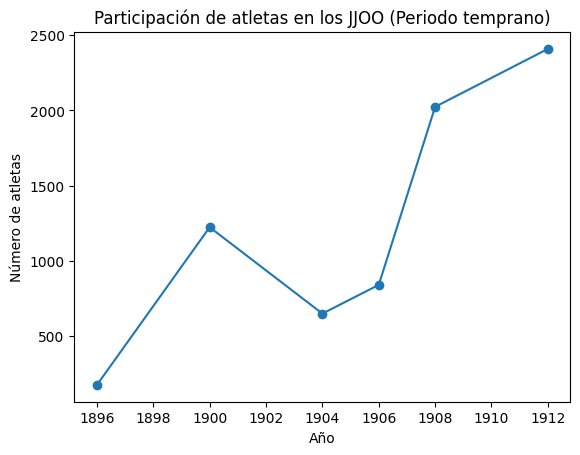

In [82]:


athletes_early.plot(marker="o")
plt.title("Participación de atletas en los JJOO (Periodo temprano)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.show()

### Participacion Paises en el periodo temprano.

In [83]:
countries_early = (
    early_period
    .groupby("Year")["Country"]
    .nunique()
)

countries_early

Year
1896    12
1900    31
1904    14
1906    20
1908    22
1912    29
Name: Country, dtype: int64

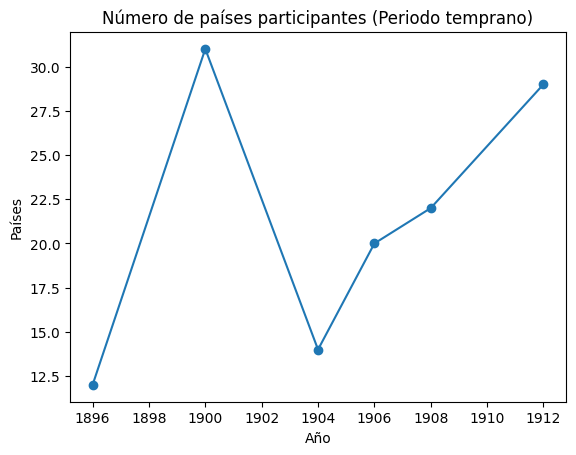

In [84]:
countries_early.plot(marker="o")
plt.title("Número de países participantes (Periodo temprano)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.show()

Observamos como en el año 1904 hubo un descenso pronunciado debido a la localizacion (USA)

### Concentracion del medallero

In [86]:
medals_early = early_period[early_period["Medal"] != "NoM"]

medals_by_country_early = (
    medals_early
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
)

medals_by_country_early.head(10)

Country
UK         696
USA        673
France     378
Sweden     299
Germany    197
Norway     158
Greece     158
Denmark    153
Canada     112
Belgium    106
Name: Medal, dtype: int64

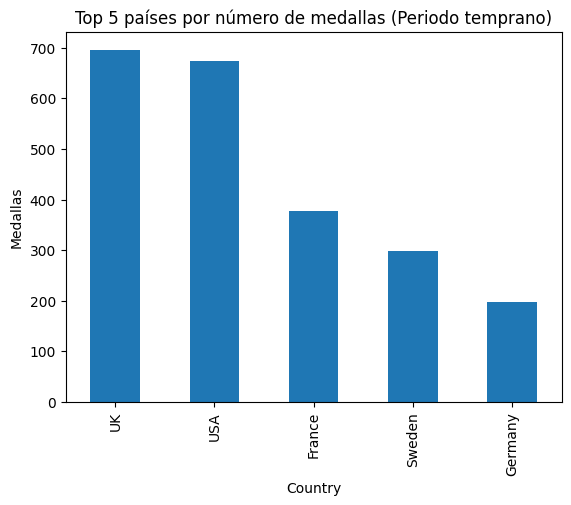

In [87]:


medals_by_country_early.head(5).plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo temprano)")
plt.ylabel("Medallas")
plt.show()

El análisis del periodo temprano muestra que los Juegos Olímpicos presentaban una participación limitada tanto en número de atletas como de países. El medallero se encontraba altamente concentrado en unas pocas naciones, reflejando el carácter elitista y poco globalizado del olimpismo en sus primeras ediciones. Estos patrones concuerdan con el contexto histórico de la época, en la que los Juegos aún no se habían consolidado como un evento deportivo internacional de masas.

## Primera Guerra Mundial (1914-1918)

La Primera Guerra Mundial representa la primera gran interrupción del movimiento olímpico moderno. El evento más significativo de este periodo es la cancelación de los Juegos Olímpicos de 1916, previstos en Berlín, lo que supuso una ruptura total de la continuidad olímpica y evidenció la vulnerabilidad de los Juegos ante los grandes conflictos internacionales.

In [92]:
jjoo[(jjoo["Year"] >= 1914) & (jjoo["Year"] <= 1918)]["Year"].unique()

array([], dtype=int64)

### Participacion Atletas

In [93]:
athletes_1912 = jjoo[jjoo["Year"] == 1912]["ID"].nunique()
athletes_1920 = jjoo[jjoo["Year"] == 1920]["ID"].nunique()

athletes_1912, athletes_1920

(2409, 2676)

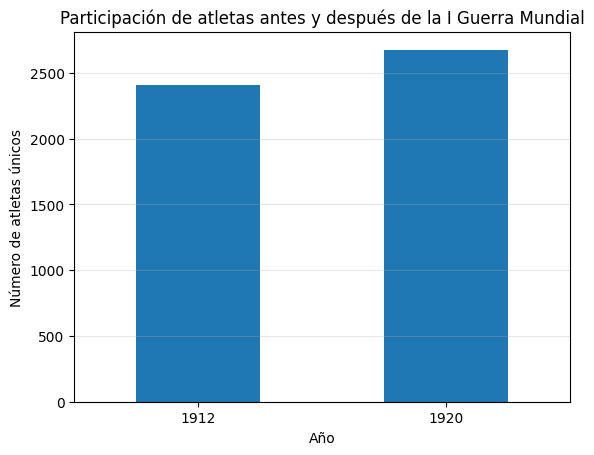

In [99]:
athletes_pre_post = (
    jjoo[jjoo["Year"].isin([1912, 1920])]
    .groupby("Year")["ID"]
    .nunique()
)

athletes_pre_post.plot(kind="bar")
plt.title("Participación de atletas antes y después de la I Guerra Mundial")
plt.ylabel("Número de atletas únicos")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Participacion Paises

In [95]:
countries_1912 = jjoo[jjoo["Year"] == 1912]["Country"].nunique()
countries_1920 = jjoo[jjoo["Year"] == 1920]["Country"].nunique()

countries_1912, countries_1920

(29, 29)

In [96]:
countries_1912_list = set(jjoo[jjoo["Year"] == 1912]["Country"].unique())
countries_1920_list = set(jjoo[jjoo["Year"] == 1920]["Country"].unique())

excluded_countries = countries_1912_list - countries_1920_list
excluded_countries

{'Austria',
 'Germany',
 'Hungary',
 'Iceland',
 'Poland',
 'Russia',
 'Turkey',
 'Unknown'}

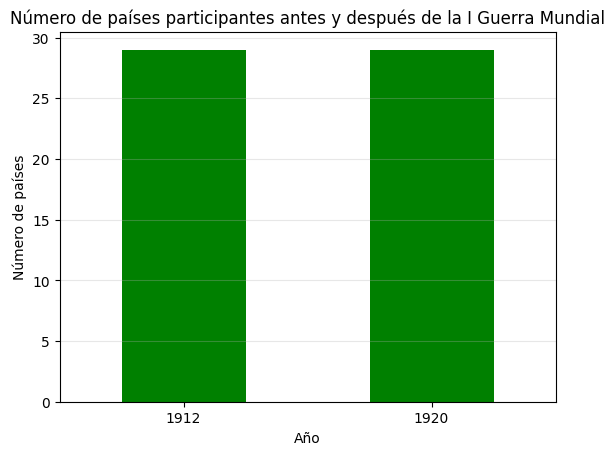

In [100]:
countries_pre_post = (
    jjoo[jjoo["Year"].isin([1912, 1920])]
    .groupby("Year")["Country"]
    .nunique()
)

countries_pre_post.plot(kind="bar", color="green")
plt.title("Número de países participantes antes y después de la I Guerra Mundial")
plt.ylabel("Número de países")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Medallero

In [98]:
medals_1912 = (
    jjoo[(jjoo["Year"] == 1912) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

medals_1920 = (
    jjoo[(jjoo["Year"] == 1920) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_igm = (
    pd.concat([medals_1912, medals_1920], axis=1)
    .fillna(0)
)

impact_medals_igm.columns = ["1912", "1920"]
impact_medals_igm["diff"] = impact_medals_igm["1920"] - impact_medals_igm["1912"]

impact_medals_igm.sort_values("diff").head()

,1912,1920,diff
Country,,,
UK,170.0,111.0,-59.0
Germany,53.0,0.0,-53.0
Sweden,190.0,154.0,-36.0
Hungary,30.0,0.0,-30.0
Finland,71.0,52.0,-19.0


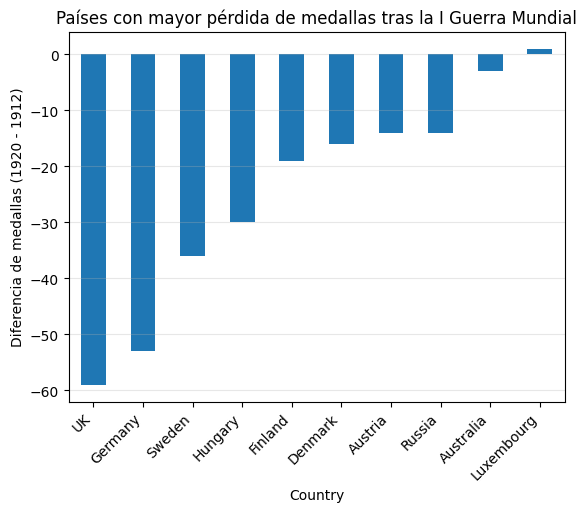

In [101]:
impact_medals_igm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor pérdida de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

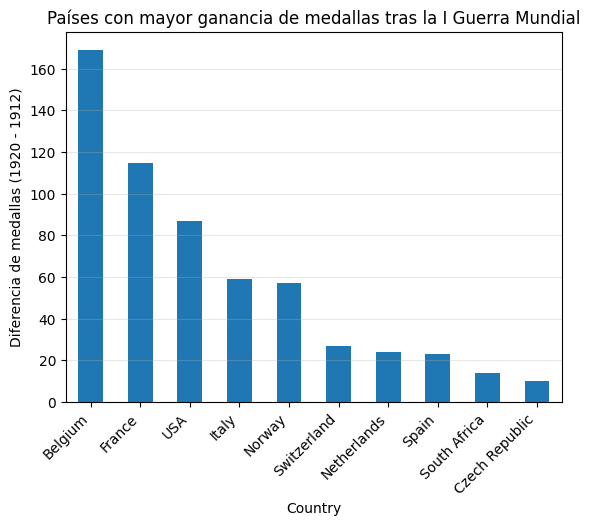

In [102]:
impact_medals_igm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor ganancia de medallas tras la I Guerra Mundial")
plt.ylabel("Diferencia de medallas (1920 - 1912)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

La Primera Guerra Mundial marca la primera gran ruptura estructural en la historia de los Juegos Olímpicos modernos. La cancelación de los Juegos de 1916, la exclusión política de países en 1920 y la redistribución del medallero evidencian que los grandes conflictos internacionales no solo interrumpen la celebración de los Juegos, sino que transforman su organización y su equilibrio competitivo.

## Periodo de entreguerras (1920–1936)

El periodo de entreguerras se caracteriza por la recuperación progresiva de los Juegos Olímpicos tras la Primera Guerra Mundial y por una creciente politización del deporte. Durante estas ediciones se observa un aumento sostenido de la participación, la reincorporación de países previamente excluidos y el uso de los Juegos como herramienta de proyección internacional, especialmente visible en los Juegos de Berlín de 1936.

In [105]:
interwar = jjoo[(jjoo["Year"] >= 1920) & (jjoo["Year"] <= 1936)]
interwar["Year"].unique()

array([1920, 1932, 1924, 1936, 1928])

### Participacion Atletas

In [106]:
athletes_interwar = (
    interwar
    .groupby("Year")["ID"]
    .nunique()
)

athletes_interwar

Year
1920    2676
1924    3256
1928    3247
1932    1922
1936    4484
Name: ID, dtype: int64

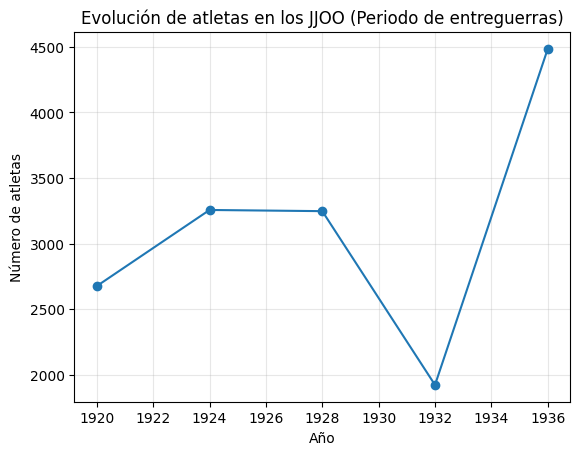

In [107]:
athletes_interwar.plot(marker="o")
plt.title("Evolución de atletas en los JJOO (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

En el 1932 se vuelve a producir una gran caida de la participacion de los atletas debido a la ubicacion de celebracion en Estados unidos.

### Participacion Paises

In [111]:
countries_interwar = (
    interwar
    .groupby("Year")["Country"]
    .nunique()
)

countries_interwar

Year
1920    29
1924    45
1928    46
1932    47
1936    49
Name: Country, dtype: int64

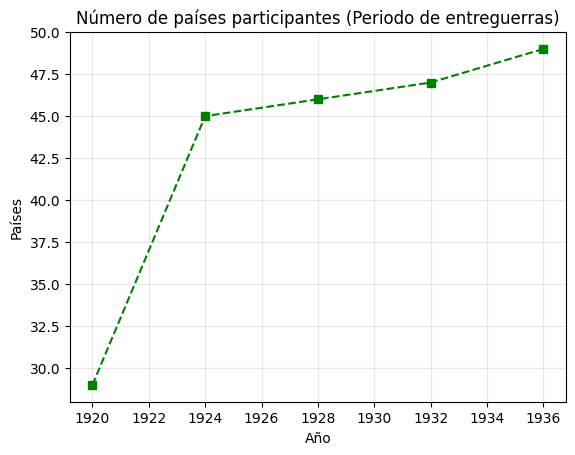

In [112]:
countries_interwar.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

### Medallero

In [113]:
medals_interwar = interwar[interwar["Medal"] != "NoM"]

medals_by_year_interwar = (
    medals_interwar
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_interwar

Year
1920    1308
1924     832
1928     734
1932     647
1936     917
Name: Medal, dtype: int64

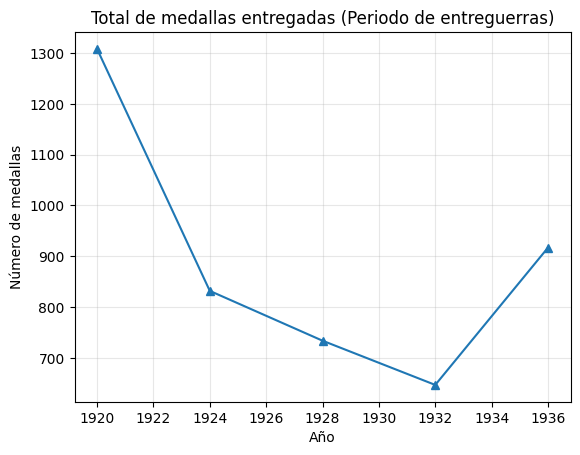

In [114]:
medals_by_year_interwar.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo de entreguerras)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

El total de medallas entregadas no mide la participación directa, sino la estructura y complejidad del programa olímpico. Aunque existe relación entre ambas variables, su comparación permite distinguir entre caídas estructurales del sistema olímpico y descensos coyunturales de participación, como los observados en algunos periodos de crisis política o económica.

In [115]:
top_countries_interwar = (
    medals_interwar
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_interwar

Country
USA        749
France     385
Italy      360
Germany    344
Sweden     330
Name: Medal, dtype: int64

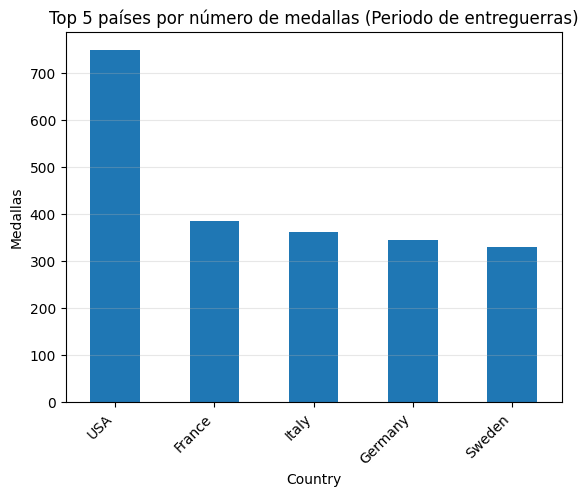

In [116]:
top_countries_interwar.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo de entreguerras)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo de entreguerras muestra una recuperación progresiva de los Juegos Olímpicos tras la ruptura provocada por la Primera Guerra Mundial. La participación de atletas y países aumenta de forma sostenida, aunque se ve afectada por eventos económicos y geográficos, como la caída de 1932. El medallero refleja una mayor competencia internacional y una creciente politización del deporte, culminando en los Juegos de 1936 como expresión máxima de esta etapa.

## Segunda Guerra Mundial (1939–1945)

La Segunda Guerra Mundial supuso la interrupción más prolongada y profunda en la historia de los Juegos Olímpicos modernos. La cancelación de dos ediciones consecutivas, en 1940 y 1944, evidenció la imposibilidad de mantener la continuidad olímpica en un contexto de conflicto global. Este periodo marca una ruptura estructural que tendrá consecuencias directas en la participación y el equilibrio competitivo de la edición de 1948.

In [118]:
jjoo[(jjoo["Year"] >= 1939) & (jjoo["Year"] <= 1945)]["Year"].unique()

array([], dtype=int64)

### Participacion Atletas

In [120]:
athletes_1936 = jjoo[jjoo["Year"] == 1936]["ID"].nunique()
athletes_1948 = jjoo[jjoo["Year"] == 1948]["ID"].nunique()

athletes_1936, athletes_1948

(4484, 4402)

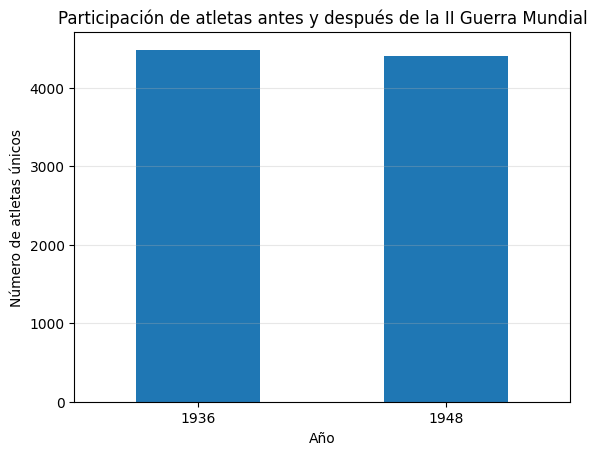

In [121]:
athletes_pre_post_iigm = (
    jjoo[jjoo["Year"].isin([1936, 1948])]
    .groupby("Year")["ID"]
    .nunique()
)

athletes_pre_post_iigm.plot(kind="bar")
plt.title("Participación de atletas antes y después de la II Guerra Mundial")
plt.ylabel("Número de atletas únicos")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Participacion Paises

In [122]:
countries_1936 = jjoo[jjoo["Year"] == 1936]["Country"].nunique()
countries_1948 = jjoo[jjoo["Year"] == 1948]["Country"].nunique()

countries_1936, countries_1948

(49, 59)

In [123]:
countries_1936_list = set(jjoo[jjoo["Year"] == 1936]["Country"].unique())
countries_1948_list = set(jjoo[jjoo["Year"] == 1948]["Country"].unique())

excluded_countries_iigm = countries_1936_list - countries_1948_list
excluded_countries_iigm

{'Boliva',
 'Bulgaria',
 'Costa Rica',
 'Estonia',
 'Germany',
 'Japan',
 'Latvia',
 'Romania'}

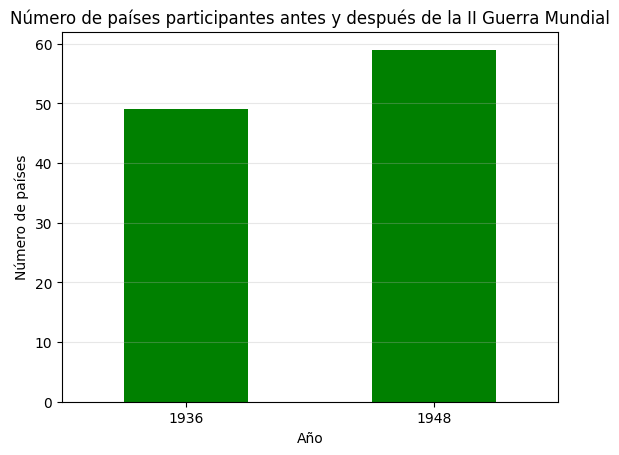

In [124]:
countries_pre_post_iigm = (
    jjoo[jjoo["Year"].isin([1936, 1948])]
    .groupby("Year")["Country"]
    .nunique()
)

countries_pre_post_iigm.plot(kind="bar", color="green")
plt.title("Número de países participantes antes y después de la II Guerra Mundial")
plt.ylabel("Número de países")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()

### Medallero

In [126]:
medals_1936 = (
    jjoo[(jjoo["Year"] == 1936) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

medals_1948 = (
    jjoo[(jjoo["Year"] == 1948) & (jjoo["Medal"] != "NoM")]
    .groupby("Country")["Medal"]
    .count()
)

impact_medals_iigm = (
    pd.concat([medals_1936, medals_1948], axis=1)
    .fillna(0)
)

impact_medals_iigm.columns = ["1936", "1948"]
impact_medals_iigm["diff"] = impact_medals_iigm["1948"] - impact_medals_iigm["1936"]

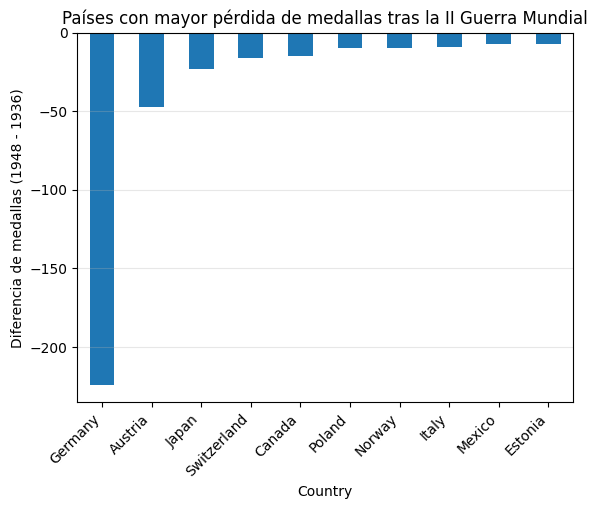

In [127]:
impact_medals_iigm.sort_values("diff").head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor pérdida de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

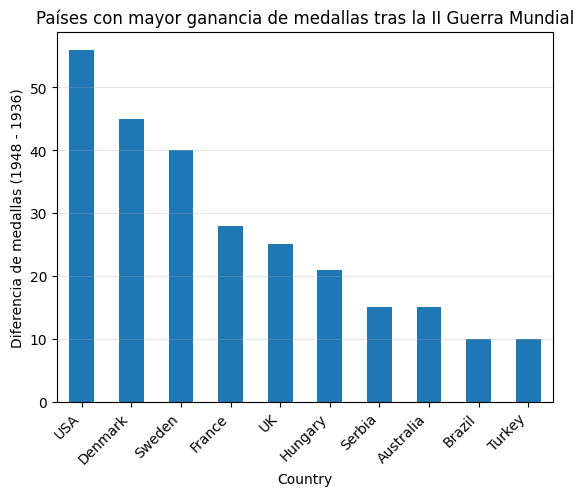

In [128]:
impact_medals_iigm.sort_values("diff", ascending=False).head(10)["diff"].plot(kind="bar")
plt.title("Países con mayor ganancia de medallas tras la II Guerra Mundial")
plt.ylabel("Diferencia de medallas (1948 - 1936)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

La Segunda Guerra Mundial representa la ruptura más profunda en la historia de los Juegos Olímpicos modernos. La cancelación de dos ediciones consecutivas y las sanciones aplicadas en 1948 provocaron una reducción significativa en la participación de atletas y países, así como una redistribución del medallero. Este periodo evidencia cómo los grandes conflictos globales no solo interrumpen los Juegos, sino que redefinen temporalmente su estructura y equilibrio competitivo.

## Periodo de posguerra (1948–1960)

El periodo de posguerra representa una fase de reconstrucción y reconfiguración de los Juegos Olímpicos tras la Segunda Guerra Mundial. A partir de los Juegos de Londres 1948, los JJOO recuperan progresivamente su continuidad, en un contexto marcado por la austeridad económica, el inicio de la Guerra Fría y la incorporación de nuevos países al panorama internacional.

In [130]:
postwar = jjoo[(jjoo["Year"] >= 1948) & (jjoo["Year"] <= 1960)]
postwar["Year"].unique()

array([1952, 1948, 1956, 1960])

### Participacion Atletas

In [134]:
athletes_postwar = (
    postwar
    .groupby("Year")["ID"]
    .nunique()
)

athletes_postwar

Year
1948    4402
1952    4932
1956    3347
1960    5352
Name: ID, dtype: int64

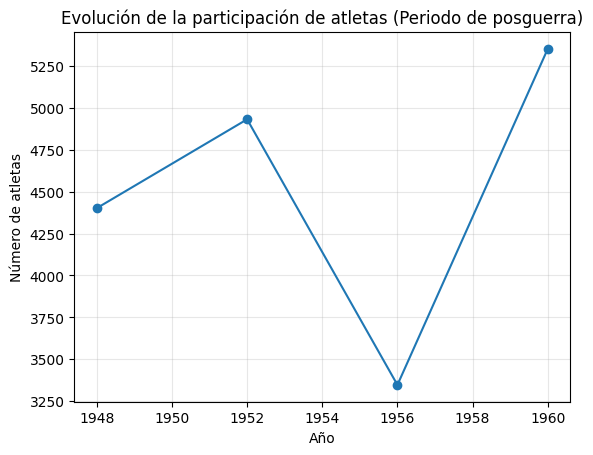

In [135]:

athletes_postwar.plot(marker="o")
plt.title("Evolución de la participación de atletas (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

La caída pronunciada en la participación de atletas observada en los Juegos Olímpicos de 1956 no responde a un retroceso estructural del olimpismo, sino a la concurrencia de factores excepcionales. La celebración de los Juegos en Melbourne supuso importantes dificultades logísticas y económicas para muchos países, mientras que diversos conflictos internacionales, como la Crisis de Suez y la invasión soviética de Hungría, provocaron boicots y ausencias significativas. La rápida recuperación de la participación en 1960 refuerza la idea de que este descenso fue coyuntural y no un cambio de tendencia.

### Participacion Paises

In [136]:
countries_postwar = (
    postwar
    .groupby("Year")["Country"]
    .nunique()
)

countries_postwar

Year
1948    59
1952    67
1956    71
1960    83
Name: Country, dtype: int64

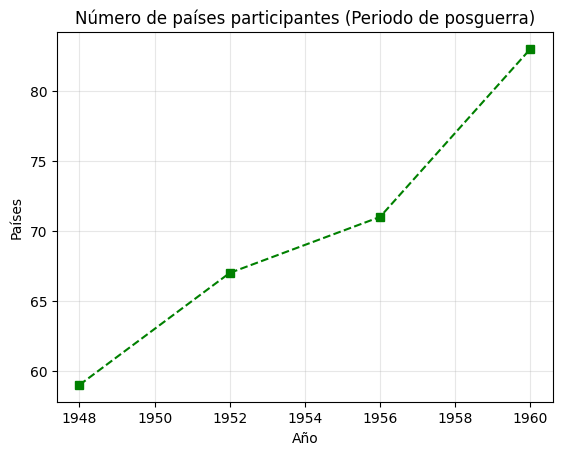

In [137]:
countries_postwar.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

### Medallero

In [139]:
medals_postwar = postwar[postwar["Medal"] != "NoM"]

medals_by_year_postwar = (
    medals_postwar
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_postwar

Year
1948    852
1952    897
1956    893
1960    911
Name: Medal, dtype: int64

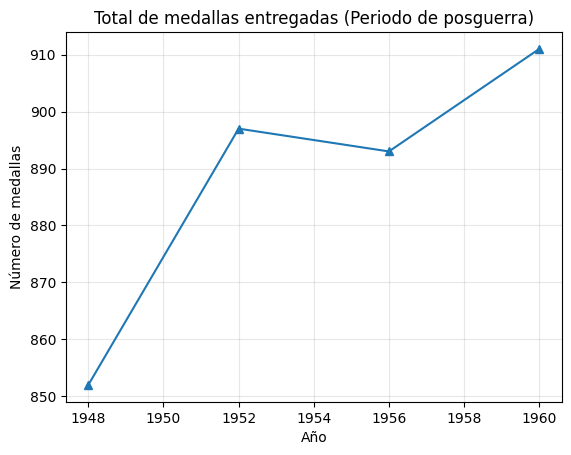

In [140]:
medals_by_year_postwar.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo de posguerra)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

In [141]:
top_countries_postwar = (
    medals_postwar
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_postwar

Country
USA        534
Russia     455
Hungary    294
Italy      256
Sweden     186
Name: Medal, dtype: int64

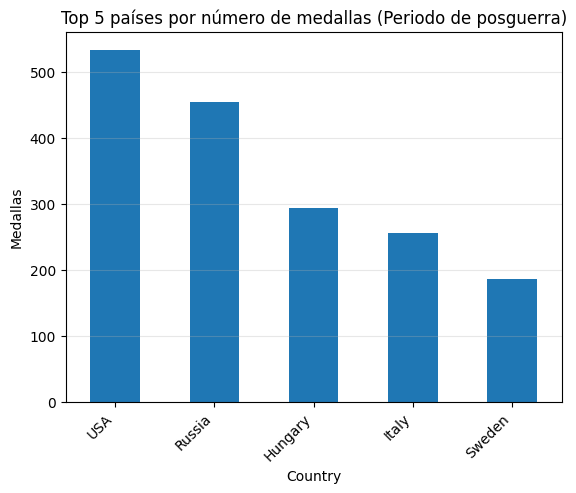

In [142]:
top_countries_postwar.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo de posguerra)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo de posguerra se caracteriza por una recuperación progresiva y sostenida de los Juegos Olímpicos. Tanto la participación de atletas como el número de países aumentan de forma constante, mientras que el medallero refleja una mayor diversidad de actores. Esta etapa marca la transición hacia unos Juegos Olímpicos más globales y estructuralmente estables, en un contexto internacional definido por la reconstrucción y el inicio de la Guerra Fría.

## Periodo moderno de los Juegos Olímpicos (1964 en adelante)

El periodo moderno de los Juegos Olímpicos se caracteriza por la consolidación definitiva del olimpismo como un evento deportivo global. A partir de la década de 1960 se observa una expansión sostenida en la participación de atletas y países, impulsada por la descolonización, la profesionalización del deporte y el creciente papel de los Juegos como escenario de competencia simbólica durante la Guerra Fría.

In [143]:
modern = jjoo[jjoo["Year"] >= 1964]
modern["Year"].unique()[:10]  # primeras ediciones del periodo

array([1992, 2012, 2000, 1996, 2008, 2016, 2004, 1984, 1968, 1972])

### Participacion Atletas

In [147]:
athletes_modern = (
    modern
    .groupby("Year")["ID"]
    .nunique()
)

athletes_modern

Year
1964     5137
1968     5558
1972     7114
1976     6073
1980     5259
1984     6798
1988     8454
1992     9386
1996    10339
2000    10647
2004    10557
2008    10899
2012    10517
2016    11179
Name: ID, dtype: int64

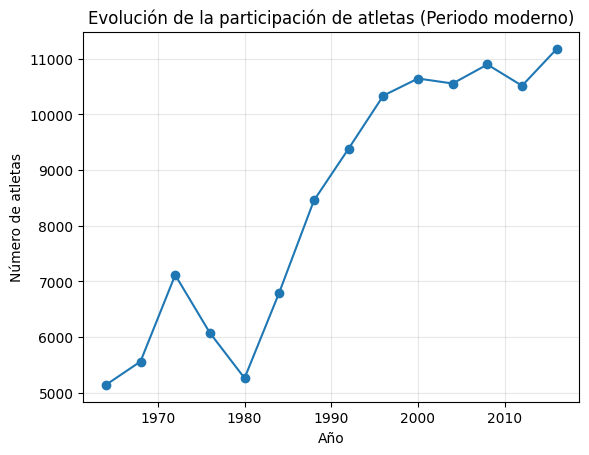

In [148]:
athletes_modern.plot(marker="o")
plt.title("Evolución de la participación de atletas (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Número de atletas")
plt.grid(alpha=0.3)
plt.show()

### Participacion Paises

In [149]:
countries_modern = (
    modern
    .groupby("Year")["Country"]
    .nunique()
)

countries_modern

Year
1964     93
1968    111
1972    120
1976     91
1980     80
1984    139
1988    156
1992    168
1996    196
2000    199
2004    200
2008    203
2012    204
2016    206
Name: Country, dtype: int64

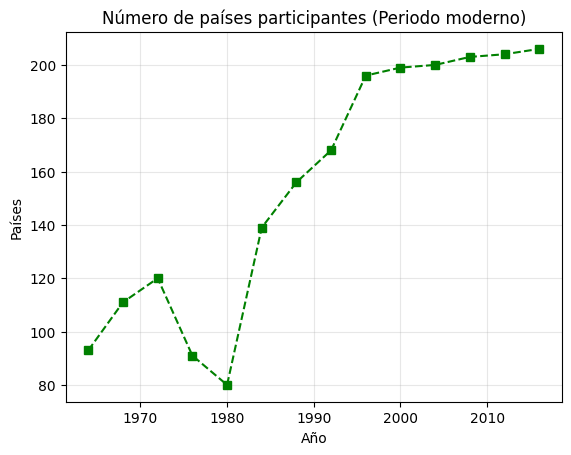

In [150]:
countries_modern.plot(marker="s", linestyle="--", color="green")
plt.title("Número de países participantes (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Países")
plt.grid(alpha=0.3)
plt.show()

Durante la década de 1980 se producen caídas puntuales en la participación olímpica asociadas a boicots políticos, especialmente en los Juegos de 1980 y 1984. Sin embargo, a diferencia de periodos anteriores, el total de medallas entregadas se mantiene relativamente estable, lo que refleja la madurez institucional del sistema olímpico y su capacidad para absorber perturbaciones políticas sin comprometer su estructura.

### Medallero

In [151]:
medals_modern = modern[modern["Medal"] != "NoM"]

medals_by_year_modern = (
    medals_modern
    .groupby("Year")["Medal"]
    .count()
)

medals_by_year_modern

Year
1964    1029
1968    1057
1972    1215
1976    1320
1980    1384
1984    1476
1988    1582
1992    1712
1996    1842
2000    2004
2004    2001
2008    2048
2012    1941
2016    2023
Name: Medal, dtype: int64

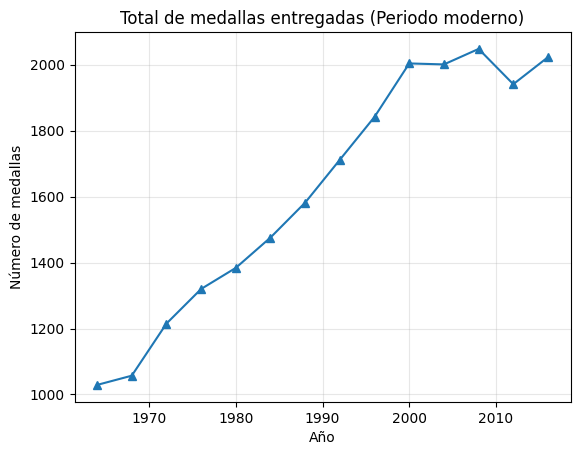

In [152]:
medals_by_year_modern.plot(marker="^")
plt.title("Total de medallas entregadas (Periodo moderno)")
plt.xlabel("Año")
plt.ylabel("Número de medallas")
plt.grid(alpha=0.3)
plt.show()

In [153]:
top_countries_modern = (
    medals_modern
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

top_countries_modern

Country
USA          3046
Russia       2716
Germany      2404
Australia    1112
China         913
Name: Medal, dtype: int64

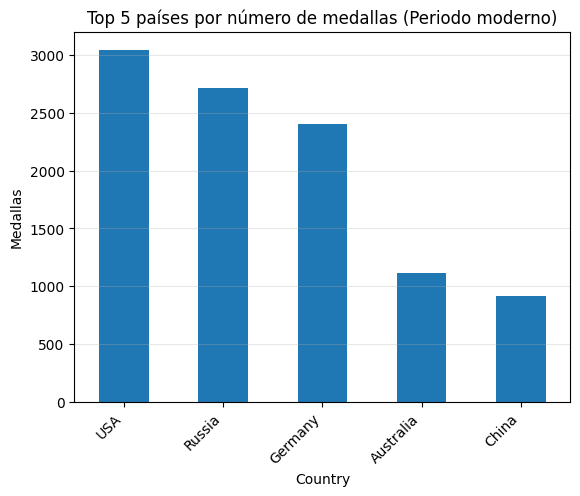

In [154]:
top_countries_modern.plot(kind="bar")
plt.title("Top 5 países por número de medallas (Periodo moderno)")
plt.ylabel("Medallas")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.3)
plt.show()

El periodo moderno de los Juegos Olímpicos se caracteriza por un crecimiento estructural y sostenido en la participación de atletas y países, así como por una mayor diversidad competitiva en el medallero. A diferencia de etapas anteriores, los eventos políticos o económicos no generan rupturas prolongadas, lo que refleja la madurez y consolidación del sistema olímpico como un evento deportivo global.

In [155]:
top5_countries = (
    jjoo[jjoo["Medal"] != "NoM"]
    .groupby("Country")["Medal"]
    .count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top5_countries

Index(['USA', 'Russia', 'Germany', 'UK', 'France'], dtype='object', name='Country')

In [156]:
athletes_top5 = (
    jjoo[jjoo["Country"].isin(top5_countries)]
    .groupby(["Year", "Country"])["ID"]
    .nunique()
    .reset_index()
)

In [157]:
medals_top5 = (
    jjoo[
        (jjoo["Country"].isin(top5_countries)) &
        (jjoo["Medal"] != "NoM")
    ]
    .groupby(["Year", "Country"])["Medal"]
    .count()
    .reset_index()
)

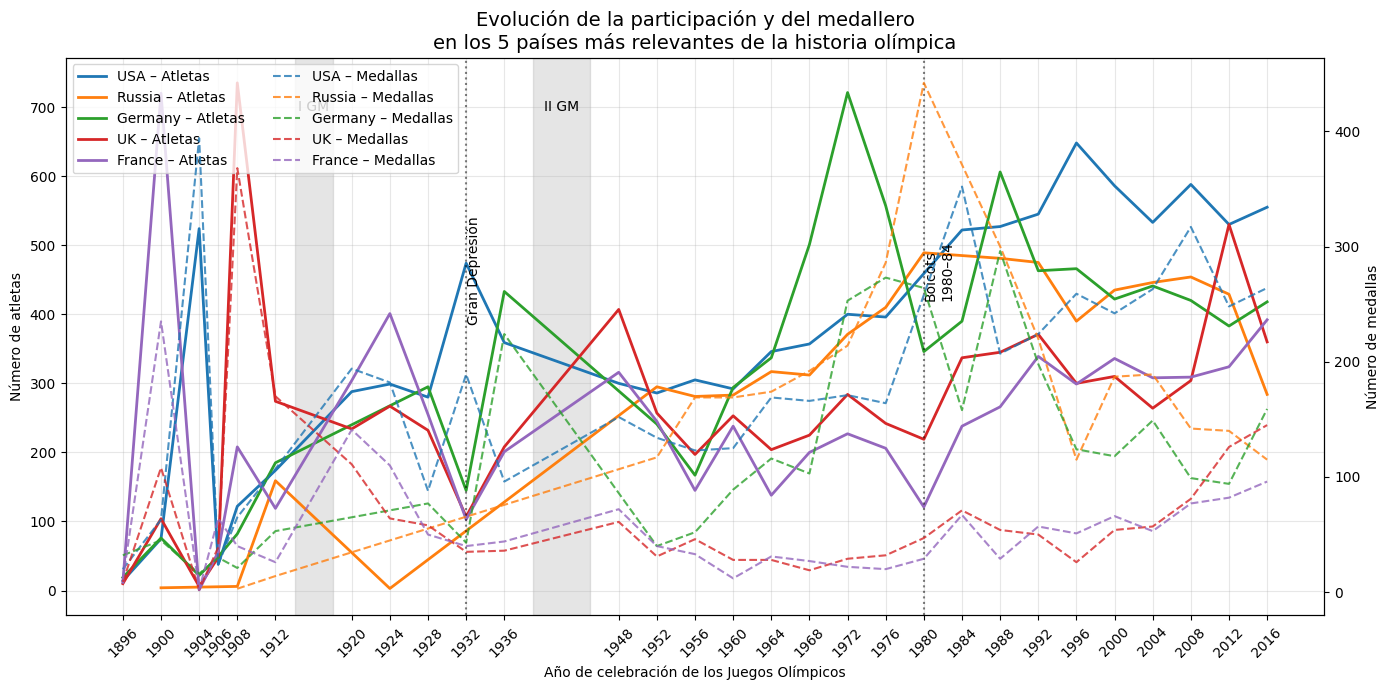

In [159]:
# Años reales de celebración de JJOO
olympic_years = sorted(jjoo["Year"].unique())

fig, ax1 = plt.subplots(figsize=(14,7))

colors = plt.cm.tab10.colors

# ===== EJE IZQUIERDO: ATLETAS =====
for i, country in enumerate(top5_countries):
    data = athletes_top5[athletes_top5["Country"] == country]
    ax1.plot(
        data["Year"],
        data["ID"],
        label=f"{country} – Atletas",
        color=colors[i],
        linewidth=2
    )

ax1.set_xlabel("Año de celebración de los Juegos Olímpicos")
ax1.set_ylabel("Número de atletas")
ax1.set_xticks(olympic_years)
ax1.set_xticklabels(olympic_years, rotation=45)
ax1.grid(alpha=0.3)

# ===== EJE DERECHO: MEDALLAS =====
ax2 = ax1.twinx()

for i, country in enumerate(top5_countries):
    data = medals_top5[medals_top5["Country"] == country]
    ax2.plot(
        data["Year"],
        data["Medal"],
        linestyle="--",
        color=colors[i],
        alpha=0.8,
        label=f"{country} – Medallas"
    )

ax2.set_ylabel("Número de medallas")

# ===== GUERRAS MUNDIALES =====
ax1.axvspan(1914, 1918, color="grey", alpha=0.2)
ax1.axvspan(1939, 1945, color="grey", alpha=0.2)

ax1.text(1916, ax1.get_ylim()[1]*0.9, "I GM", ha="center")
ax1.text(1942, ax1.get_ylim()[1]*0.9, "II GM", ha="center")

# ===== EVENTOS CLAVE =====
ax1.axvline(1932, linestyle=":", color="black", alpha=0.5)
ax1.text(1932, ax1.get_ylim()[1]*0.6, "Gran Depresión", rotation=90, va="center")

ax1.axvline(1980, linestyle=":", color="black", alpha=0.5)
ax1.text(1980, ax1.get_ylim()[1]*0.6, "Boicots\n1980–84", rotation=90, va="center")

# ===== TÍTULO =====
plt.title(
    "Evolución de la participación y del medallero\n"
    "en los 5 países más relevantes de la historia olímpica",
    fontsize=14
)

# ===== LEYENDA LIMPIA =====
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc="upper left",
    ncol=2
)

plt.tight_layout()
plt.show()

El gráfico combina la evolución de la participación de atletas y del número de medallas en los cinco países más relevantes de la historia olímpica, utilizando exclusivamente los años en los que se celebraron los Juegos Olímpicos. La diferenciación mediante líneas continuas (atletas) y discontinuas (medallas) permite comparar la evolución de la participación y el rendimiento deportivo. Se observan rupturas estructurales durante las Guerras Mundiales, así como descensos coyunturales asociados a crisis económicas y boicots políticos, mientras que el periodo moderno muestra un crecimiento sostenido y estable.

El análisis por franjas históricas muestra que la evolución de los Juegos Olímpicos ha estado estrechamente ligada al contexto histórico internacional. Los primeros Juegos presentan una participación limitada y un medallero muy concentrado, mientras que las Guerras Mundiales provocan rupturas estructurales visibles en la cancelación de ediciones, la exclusión de países y la redistribución del medallero. 

En las etapas posteriores se observa una recuperación progresiva y una expansión sostenida de la participación, con caídas puntuales asociadas a crisis económicas, factores geográficos o boicots políticos. A partir del periodo moderno, los Juegos Olímpicos se consolidan como un evento global y estructuralmente robusto, capaz de absorber perturbaciones coyunturales sin alterar su tendencia general de crecimiento. En conjunto, los resultados respaldan la hipótesis de que los distintos periodos históricos configuran etapas diferenciadas en la evolución del olimpismo.